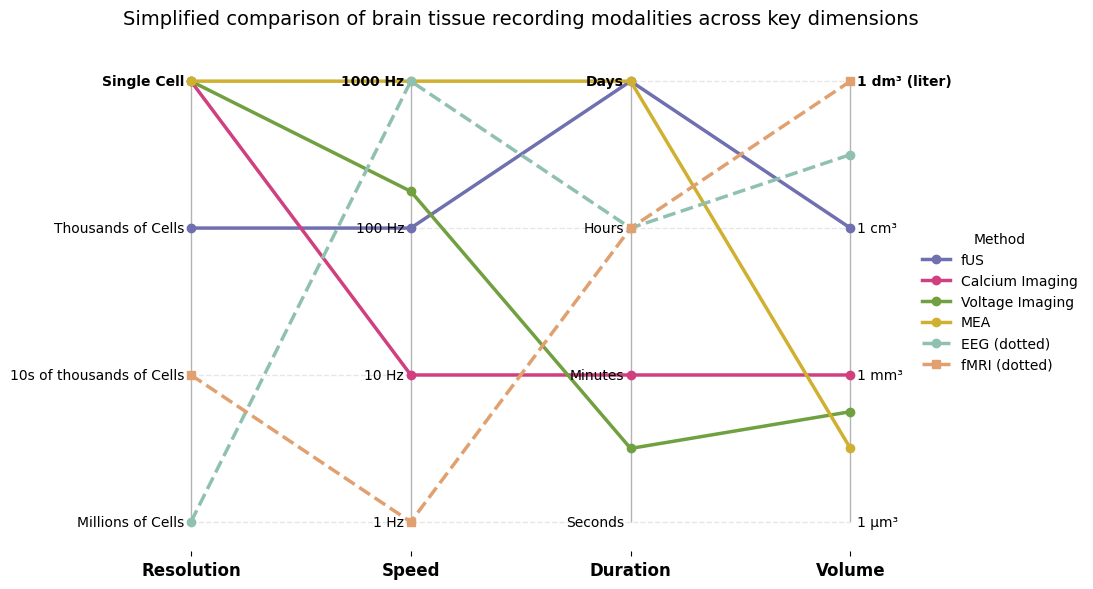

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from style import apply_style, save_figure, COLORS, CATEGORICAL_COLORS, GOLD

apply_style()

# Categories / x-positions
categories = ["Resolution", "Speed", "Duration", "Volume"]
x = np.arange(len(categories))

# Data for each method (values 1–4 on each axis)
methods = {
    "fUS": {
        "values": [3, 3, 4, 3],
        "color": CATEGORICAL_COLORS[0],
        "linestyle": "-",
        "marker": "o",
    },
    "Calcium Imaging": {
        "values": [4, 2, 2, 2],
        "color": CATEGORICAL_COLORS[1],
        "linestyle": "-",
        "marker": "o",
    },
    "Voltage Imaging": {
        "values": [4, 3.25, 1.5, 1.75],
        "color": CATEGORICAL_COLORS[2],
        "linestyle": "-",
        "marker": "o",
    },
    "MEA": {
        "values": [4, 4, 4, 1.5],
        "color": GOLD,
        "linestyle": "-",
        "marker": "o",
    },
    "EEG": {
        "values": [1, 4, 3, 3.5],
        "color": CATEGORICAL_COLORS[3],
        "linestyle": "--",
        "marker": "o",
    },
    "fMRI": {
        "values": [2, 1, 3, 4],
        "color": CATEGORICAL_COLORS[4],
        "linestyle": "--",
        "marker": "s",
    },
}

fig, ax = plt.subplots(figsize=(11, 6))

# Basic layout
ax.set_xlim(-0.2, len(categories) - 1 + 0.2)
ax.set_ylim(0.8, 4.2)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=12, fontweight="500")
ax.set_yticks([])

for spine in ax.spines.values():
    spine.set_visible(False)

# Vertical axes
for xi in x:
    ax.vlines(xi, 1, 4, colors=COLORS['grid'], linewidth=1, zorder=0)

# Horizontal dashed gridlines
for y in [1, 2, 3, 4]:
    ax.hlines(y, x[0], x[-1], colors=COLORS['grid'], linewidth=1, linestyles="--", zorder=0)

# Labels on each vertical axis
y_levels = [1, 2, 3, 4]
axis_labels = {
    "Resolution": ["Millions of Cells", "10s of thousands", "Thousands of Cells", "Single Cell"],
    "Speed": ["1 Hz", "10 Hz", "100 Hz", "1000 Hz"],
    "Duration": ["Seconds", "Minutes", "Hours", "Days"],
    "Volume": ["1 µm³", "1 mm³", "1 cm³", "1 dm³ (liter)"],
}

for i, cat in enumerate(categories):
    labels = axis_labels[cat]
    for y, label in zip(y_levels, labels):
        ha = "left" if cat == "Volume" else "right"
        x_offset = 0.03 if cat == "Volume" else -0.03
        fontweight = "600" if y == 4 else "400"
        ax.text(i + x_offset, y, label, ha=ha, va="center", fontsize=10, fontweight=fontweight, color=COLORS['text'])

# Plot the methods
handles = []
labels_list = []
for name, props in methods.items():
    (line,) = ax.plot(
        x, props["values"],
        linestyle=props["linestyle"],
        marker=props["marker"],
        linewidth=2.5,
        markersize=6,
        color=props["color"],
        markeredgecolor='white',
        markeredgewidth=1.5,
        label=name,
    )
    handles.append(line)
    labels_list.append(name)

ax.set_title("Brain Tissue Recording Modalities Comparison", fontsize=14, pad=20, color=COLORS['title'])
ax.legend(handles, labels_list, title="Method", loc="center left", bbox_to_anchor=(1.02, 0.5),
          frameon=True, fontsize=10, title_fontsize=10)

plt.tight_layout()
save_figure(fig, 'recording-modalities')
plt.show()